
<img src="http://www.nserc-crsng.gc.ca/_gui/wmms.gif" alt="Canada logo" align="right">

<br>

<img src="http://www.triumf.ca/sites/default/files/styles/gallery_large/public/images/nserc_crsng.gif?itok=H7AhTN_F" alt="NSERC logo" align="right" width = 90>



# Exploring NSERC Awards Data


Canada's [Open Government Portal](http://open.canada.ca/en) includes [NSERC Awards Data](http://open.canada.ca/data/en/dataset/c1b0f627-8c29-427c-ab73-33968ad9176e) from 1991 through 2016.

The awards data (in .csv format) were copied to an [Amazon Web Services S3 bucket](http://docs.aws.amazon.com/AmazonS3/latest/dev/UsingBucket.html). This open Jupyter notebook starts an exploration of the NSERC investment portfolio during the 1995 -- 2016 epoch.
> **Acknowledgement:** I thank [Ian Allison](https://github.com/ianabc) and [James Colliander](http://colliand.com) of the [Pacific Institute for the Mathematical Sciences](http://www.pims.math.ca/) for building the [JupyterHub service](https://pims.jupyter.ca) and for help with this notebook. -- I. Heisz

In [7]:
# For Plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
!pip3 install plotly --user; #Plotly for graphing
import plotly.plotly as py
import plotly.graph_objs as go

In [6]:
# Note: haven't yet uploaded this to github or shared it
import numpy as np
import pandas as pd
import sys

## Bring in a selection of the NSERC awards data starting with 1995 and ending with 2016.
## Throw away as much as you can to keep the DataFrame small enough to manipulate using a laptop.

df = pd.DataFrame()

startYear = 1995
endYear   = 2017  ## The last year is not included, so if it was 2017 it means we include the 2016 collection but not 2017.

## Reads and processes the raw csv datafiles.
for year in range(startYear, endYear):
    file = 'https://s3.ca-central-1.amazonaws.com/open-data-ro/NSERC/NSERC_GRT_FYR' + str(year) + '_AWARD.csv.gz'
    df = df.append(pd.read_csv(file, compression='gzip', usecols = [1, 9, 11, 17, 25], encoding='latin-1'))
    
    print(year)
    
## Rename columns for better readability.
df.columns = ['Name', 'FiscalYear', 'AwardAmount', 'Committee', 'ResearchSubject']     
  

1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [8]:
print("DataFrame: {:4.2f} Mb".format(sys.getsizeof(df) / (1024. * 1024)))  

DataFrame: 49.30 Mb


In [9]:
df.columns

Index(['Name', 'FiscalYear', 'AwardAmount', 'Committee', 'ResearchSubject'], dtype='object')

In [10]:
sanityCheck0 = df.loc[(df['Name'] == 'LangeDiCesare, Kevin')]
sanityCheck0 # ...  

,Name,FiscalYear,AwardAmount,Committee,ResearchSubject
11974,"LangeDiCesare, Kevin",2014,4666,996,2800
12100,"LangeDiCesare, Kevin",2015,7000,996,2800
12342,"LangeDiCesare, Kevin",2016,0,996,2800


In [11]:
sanityCheck1 = df.loc[(df['Name'] == 'Forrest, Tracey')]
sanityCheck1

,Name,FiscalYear,AwardAmount,Committee,ResearchSubject
7117,"Forrest, Tracey",2016,7205799,9998,2700


In [12]:
sanityCheck2 = df.loc[(df['Name'] == 'McWalter, Ian')]

In [14]:
year2016 = df.loc[(df['FiscalYear'] == 2016)]

# Make a new column that is the sum of all Awards that each individual has received 
year2016 = year2016.assign(TotalAward=year2016.groupby(['Name'])['AwardAmount'].transform('sum'))

In [15]:
# Drop the duplicate names, now that we have the award amount info from them
deduplicatedData = year2016.drop_duplicates(subset = 'Name')

# Sort by total award for the given year
byAwardAmount = deduplicatedData.sort_values(by=['TotalAward'], ascending=[True])

byAwardAmount

,Name,FiscalYear,AwardAmount,Committee,ResearchSubject,TotalAward
12342,"LangeDiCesare, Kevin",2016,0,996,2800,0
8072,"Glass, Anthony",2016,1,1502,4907,1
24416,"Yang, JianMing",2016,322,1551,9999,322
13413,"Lionard, Marie",2016,337,1552,9999,337
3875,"Chem, Nolan",2016,375,996,9999,375
22165,"Tiege, Paul",2016,473,1555,9999,473
8049,"Girault, L",2016,522,1552,9999,522
16983,"Paddle, Helena",2016,562,996,6100,562
6424,"ElSakka, Yomna",2016,562,996,5204,562
6983,"Fitzpatrick, LukePhillipJames",2016,562,996,2950,562


In [16]:
sanityCheck3 = deduplicatedData.loc[(deduplicatedData['Name'] == 'McWalter, Ian')]

In [17]:
sanityCheck4 = byAwardAmount.loc[(byAwardAmount['Name'] == 'McWalter, Ian')]

In [22]:
# Make nice indices for the rows, they got messed up when we re-arranged them by AwardTotal

# byAwardAmount.shape[0] gives you the number of rows in byAwardAmount
#byAwardAmount.id = range(byAwardAmount.shape[0]-10000)

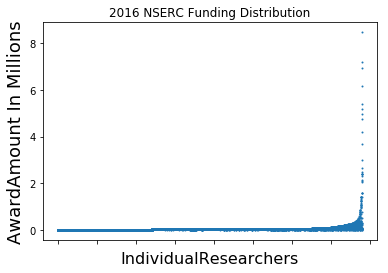

In [18]:
# static plot

axes = plt.gca()
axes.set_xticklabels([]) # make it so the x axis is not numbered
#axes.set_xlim([0,2000])
#axes.set_ylim([0,0.4])

#xAxis = 'ResearchSubject'
yAxis = 'AwardAmount'

#x = byAwardAmount[xAxis]
x = range(byAwardAmount.shape[0])
plt.xlabel('IndividualResearchers', fontsize=16)
x = x #Scale the x axis


y = byAwardAmount[yAxis]
plt.ylabel(yAxis+' In Millions', fontsize=18)
y = y/10**6 #Scale the y axis

plt.title('2016 NSERC Funding Distribution')

# plot
plot = plt.scatter(x,y, s=1)

plt.show()

In [1]:
# Interactive
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.tools as tls
import matplotlib.pylab as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

fig = plt.Figure()
axes = fig.gca()

axes.plot(x,y)
canvas = FigureCanvas(fig)
plotly_fig = tls.mpl_to_plotly(fig)
py.iplot(plotly_fig)

NameError: name 'x' is not defined

In [ ]:
'This make take a minute, please be patient'
#plt.bar(x, y)
#plt.show()

In [ ]:
# year = 2016
# yearData = mathFundingData.loc[(mathFundingData['FiscalYear'] == year)]
# yearData.head()

Tasks:

Colour according to research category.

Also make a research vs. industry funding colour coded graph.

Do some for individual research categories.

Loop through all the years.

Collect stats on the buckets. "buckets" hmm, if they exist.